<a href="https://colab.research.google.com/github/gideonkipkorir/Data_projects_repo/blob/main/Airlines_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libriaries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

##The effects of different factors on air traffic passenger numbers, such as the time of year or day, the price of airfare, or the number of flights offered by an airline

In [ ]:
a_df = pd.read_csv('/content/drive/MyDrive/data/Air_Traffic_Passenger_Statistics.csv')
a_df.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


## Data understanding

In [ ]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        15007 non-null  int64 
 1   Activity Period              15007 non-null  int64 
 2   Operating Airline            15007 non-null  object
 3   Operating Airline IATA Code  14953 non-null  object
 4   Published Airline            15007 non-null  object
 5   Published Airline IATA Code  14953 non-null  object
 6   GEO Summary                  15007 non-null  object
 7   GEO Region                   15007 non-null  object
 8   Activity Type Code           15007 non-null  object
 9   Price Category Code          15007 non-null  object
 10  Terminal                     15007 non-null  object
 11  Boarding Area                15007 non-null  object
 12  Passenger Count              15007 non-null  int64 
 13  Adjusted Activity Type Code  15

In [ ]:
a_df.shape

(15007, 17)

In [ ]:
a_df.nunique()

index                          15007
Activity Period                  129
Operating Airline                 77
Operating Airline IATA Code       73
Published Airline                 68
Published Airline IATA Code       64
GEO Summary                        2
GEO Region                         9
Activity Type Code                 3
Price Category Code                2
Terminal                           5
Boarding Area                      8
Passenger Count                11699
Adjusted Activity Type Code        3
Adjusted Passenger Count       11702
Year                              12
Month                             12
dtype: int64

In [ ]:
a_df.isnull().sum()

index                           0
Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [ ]:
a_df[a_df['Published Airline IATA Code'].isnull()==True]#observations with missing values

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
148,148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18,Deplaned,18,2005,August
6814,6814,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73,Deplaned,73,2010,May
6815,6815,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73,Enplaned,73,2010,May
6925,6925,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Deplaned,Other,International,A,160,Deplaned,160,2010,June
6926,6926,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Enplaned,Other,International,A,160,Enplaned,160,2010,June
7173,7173,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,118,Deplaned,118,2010,August
7174,7174,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,118,Enplaned,118,2010,August
7747,7747,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,40,Deplaned,40,2011,January
7748,7748,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,40,Enplaned,40,2011,January
7972,7972,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,64,Deplaned,64,2011,March


### Data description.

0--Index 

1--Activity Period----The date of the activity. (Date)

2--Operating Airline----The airline that operated the flight. (String)

3--Operating Airline IATA Code----Operating Airline IATA Code

4--Published Airline----The airline that published the fare for the flight. (String)

5--Published Airline IATA Code----The IATA code of the airline that published the fare for the flight. (String)

6--GEO Summary----A summary of the geographic region. (String)

7--GEO Region----The geographic region. (String)

8--Activity Type Code----The type of activity. (String)

9--Price Category Code----The price category of the fare. (String)

10--Terminal----The terminal of the flight. (String)

11--Boarding Area----The boarding area of the flight. (String)

12--Passenger Count----The number of passengers on the flight. (Integer)

13--Adjusted Activity Type Code----The type of activity, adjusted for missing data. (String)

14--Adjusted Passenger Count----The number of passengers on the flight, adjusted for missing data. (Integer)

15--Year----The year of the activity. (Integer)

16--Month----The month of the activity. (Integer)

## Data cleaning

In [ ]:
#droping some columns that appear to be duplicate
a_df = a_df.drop(['Adjusted Passenger Count', 'Published Airline IATA Code', 'index'],1)
a_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


(15007, 14)

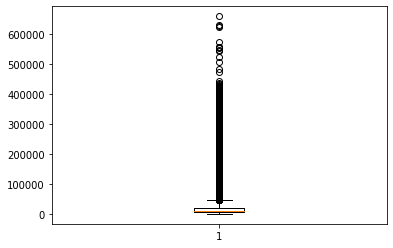

In [ ]:
#checking for outliers in Air_Traffic_Passenger_Statistics
plt.boxplot(a_df['Passenger Count'])
plt.show()

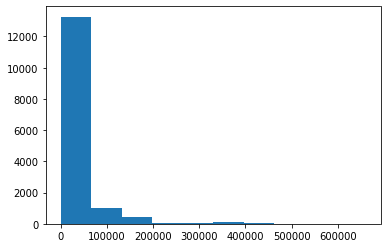

In [ ]:
plt.hist(a_df['Passenger Count'  ])
plt.show()

In [ ]:
a_df.describe()

,Activity Period,Passenger Count,Year
count,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,2010.385220
std,313.336196,58319.509284,3.137589
min,200507.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,2008.000000
50%,201011.000000,9210.000000,2010.000000
75%,201308.000000,21158.500000,2013.000000
max,201603.000000,659837.000000,2016.000000


## Data pre-processing

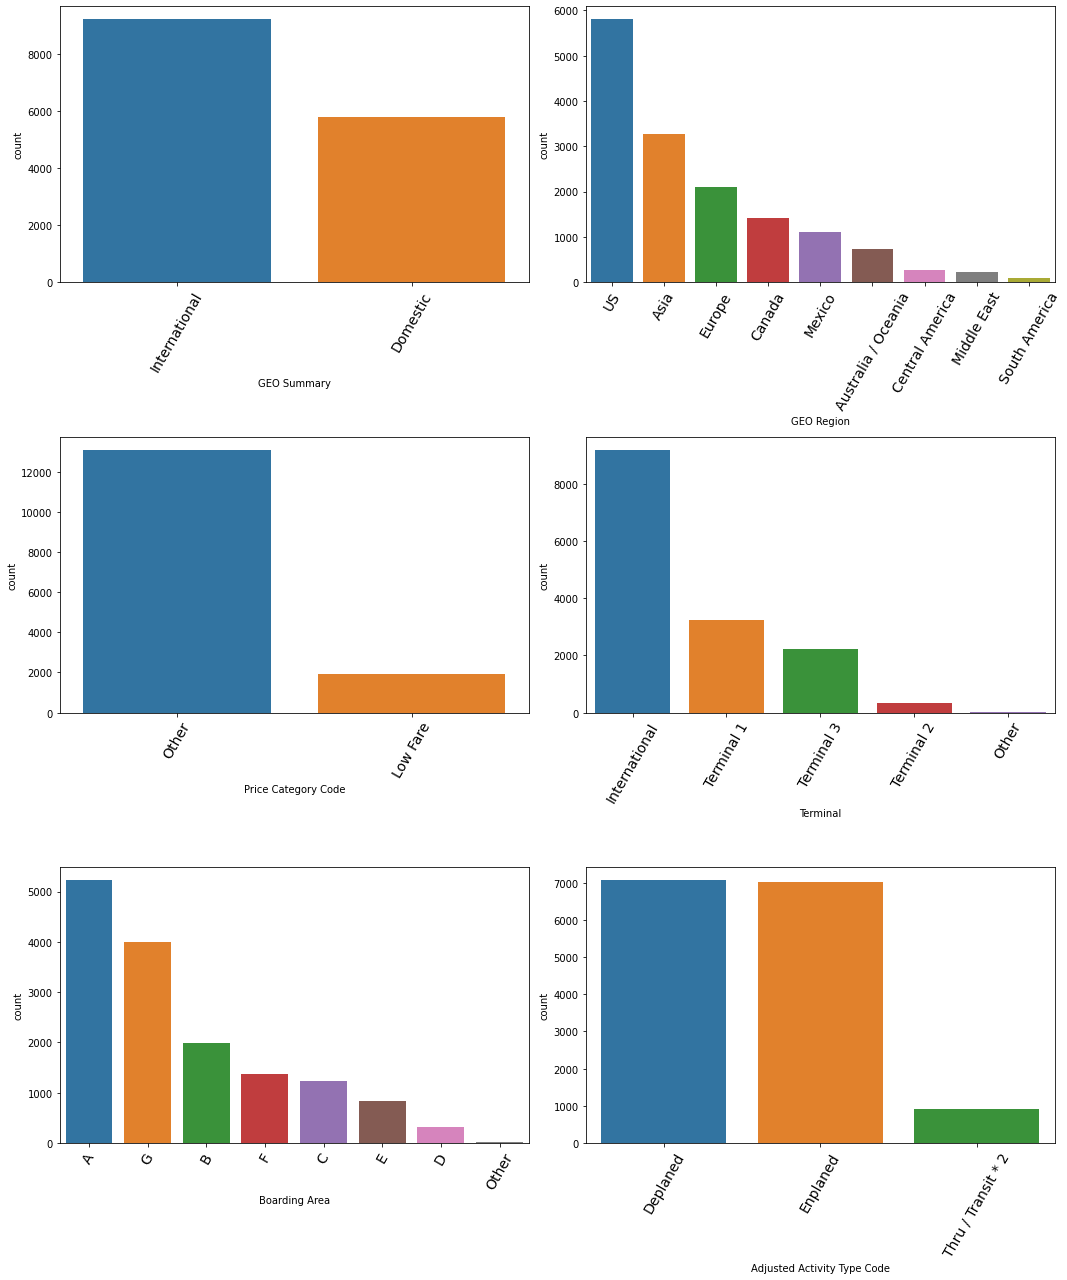

In [ ]:
#EDA
cols = ['GEO Summary',
'GEO Region',
'Price Category Code',
'Terminal',
'Boarding Area',
'Adjusted Activity Type Code']

plt.figure(figsize=(15,40))
for i, col in enumerate(cols):
    axes = plt.subplot(7,2,i + 1)
    sns.countplot(x=a_df[col], order=a_df[col].value_counts().index)
    plt.xticks(fontsize=14, rotation=60)
   
plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

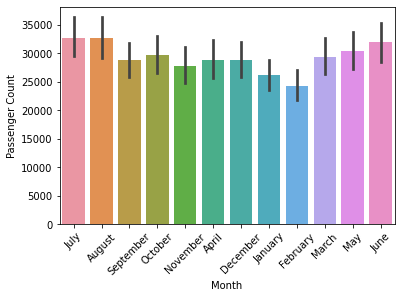

In [ ]:
sns.barplot(data = a_df, x = 'Month', y='Passenger Count',estimator = np.mean)
plt.xticks(rotation = 45)

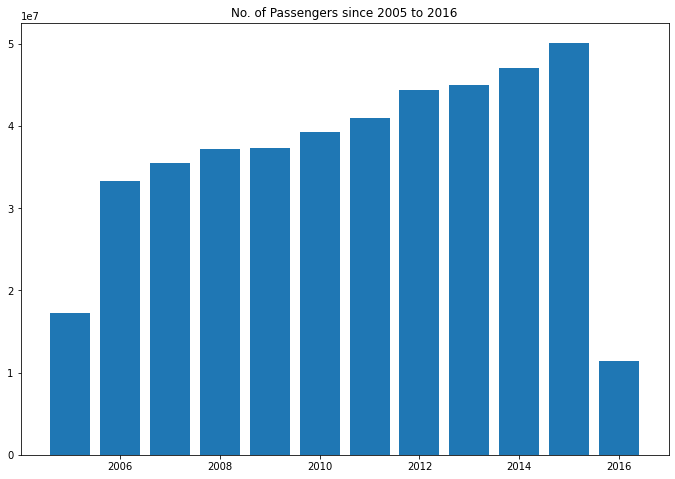

In [ ]:
Year=a_df.groupby('Year').agg({"Passenger Count":sum})
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
x_axis=Year.index
y_axis= Year['Passenger Count']
ax.bar(x_axis,y_axis)
plt.title("No. of Passengers since 2005 to 2016")
plt.show()

In [ ]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   GEO Summary                  15007 non-null  object
 5   GEO Region                   15007 non-null  object
 6   Activity Type Code           15007 non-null  object
 7   Price Category Code          15007 non-null  object
 8   Terminal                     15007 non-null  object
 9   Boarding Area                15007 non-null  object
 10  Passenger Count              15007 non-null  int64 
 11  Adjusted Activity Type Code  15007 non-null  object
 12  Year                         15007 non-null  int64 
 13  Month                        15

In [ ]:
df = a_df.copy()

In [ ]:
le = LabelEncoder()

for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])

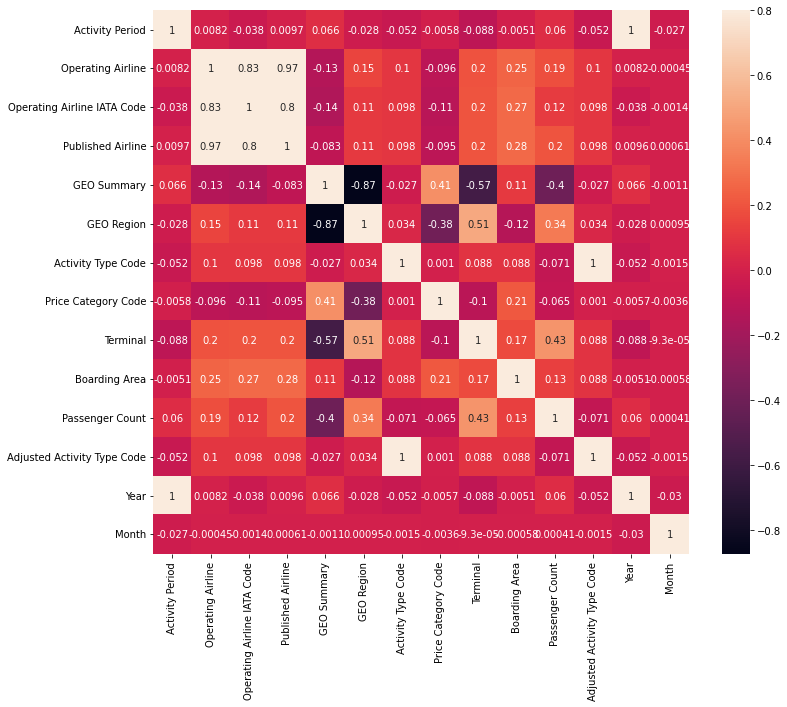

In [ ]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot =True, vmax =0.8)
# plt.lay_out()
plt.show()

## Hypothesis testing
<li>Some periods (Months), have different passenger air traffic</li>
<li>Does price category affect passenger air traffic?</li>
<li>Does Terminals affect passenger air traffic?</li>

In [ ]:
#Does geo regions affect passenger air traffic?
low_fare = np.array(a_df[a_df['Price Category Code']!='Other']['Passenger Count'])
other = np.array(a_df[a_df['Price Category Code']=='Other']['Passenger Count'])
# Import the library
import scipy.stats as stats
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=low_fare, b=other, equal_var=True)


Ttest_indResult(statistic=7.984852681176731, pvalue=1.5083748719513188e-15)

Reject the null hypothesis,and accept the null hypothesis. This implies that different fare categories have influence on passanger air trafific.

In [ ]:
a_df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code',
       'Price Category Code', 'Terminal', 'Boarding Area', 'Passenger Count',
       'Adjusted Activity Type Code', 'Year', 'Month'],
      dtype='object')

In [ ]:
a_df.rename(columns = {'Passenger Count': 'Passenger_Count','GEO Region':'GEO_Region' }, inplace = True)

In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Passenger_Count ~ C(Month)', data=a_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Month),8.782709e+10,11.0,2.349836,0.00687
Residual,5.095006e+13,14995.0,NaN,NaN


reject the null hypthesis and accept the null, period of the year(month) has impact on passenger air traffic

In [ ]:
#Ordinary Least Squares (OLS) model
model = ols('Passenger_Count ~ C(Terminal)', data=a_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Terminal),1.044436e+13,4.0,964.970403,0.0
Residual,4.059353e+13,15002.0,NaN,NaN
